In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

In [2]:
import ktrain
from ktrain import text

In [3]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from IPython.display import Markdown
from IPython.display import display

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [4]:
import json

data = json.load(open("./data/dataset.json", "r"))

data = pd.DataFrame(data)
data.sample(10)

,text,author_id,label,created_at,retweet_count,reply_count,like_count,quote_count,in_reply_to_user_id
252121,Today's update - our story about the 200% spik...,20451881,real,2020-04-29T07:19:32.000Z,3,0,2,0,False
227884,@bsdavidson360 @realDonaldTrump @POTUS @VP Wha...,198415967,real,2020-04-05T06:11:12.000Z,0,1,0,0,False
158180,"@bashy_io The epidemiological context, cross r...",88703977,real,2020-04-28T08:09:04.000Z,1,1,2,0,False
62002,"@laralogan Hey Rex, Block or Charge?",34348391,real,2020-06-28T04:35:51.000Z,0,0,0,0,False
64962,@blairanderson35 Maybe this is definition wobb...,284611951,real,2020-06-29T23:41:06.000Z,0,1,0,0,False
70255,@dodgeluvr1 @hsmiceli @furflys @richdavisphd @...,178213281,real,2020-07-01T16:50:45.000Z,0,1,0,0,False
142346,COVID-19 Is Making Psychiatric Treatment Tough...,1241760764828024833,real,2020-04-09T23:54:28.000Z,0,0,0,0,True
215901,"@AlterEgon75 @GovMLG What, are you too cool to...",116568523,real,2020-05-01T21:00:19.000Z,0,5,18,0,False
144427,@Grainne43 I think you’ve outlined pretty much...,963913183,real,2020-05-01T23:02:14.000Z,0,0,2,0,False
31678,Tanky talks about her My Pet #Monster and othe...,812186204586311680,real,2020-06-28T16:17:13.000Z,0,0,0,0,True


In [5]:
test_data = data.groupby("label").sample(frac=0.2)
data = data.drop(index=test_data.index)

In [6]:
data.text.str.split().apply(len).describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95])

count    177151.000000
mean         25.558772
std          14.739339
min           1.000000
25%          12.000000
50%          23.000000
75%          38.000000
90%          46.000000
95%          50.000000
max         106.000000
Name: text, dtype: float64

In [7]:
data.label.value_counts()

real    168620
fake      8531
Name: label, dtype: int64

In [8]:
trn, val, preproc = text.texts_from_df(
    data,
    text_column = "text",
    label_columns="label",
    maxlen=50,
    ngram_range=1,
    random_state=41,
    preprocess_mode="standard"
)

['fake', 'real']
        fake  real
80890    0.0   1.0
14311    0.0   1.0
216719   0.0   1.0
41661    0.0   1.0
22878    0.0   1.0
['fake', 'real']
        fake  real
208472   0.0   1.0
36960    0.0   1.0
77453    0.0   1.0
151760   0.0   1.0
19093    0.0   1.0
language: en
Word Counts: 249420
Nrows: 159435
159435 train sequences
train sequence lengths:
	mean : 26
	95percentile : 49
	99percentile : 54
x_train shape: (159435,50)
y_train shape: (159435, 2)
Is Multi-Label? False
17716 test sequences
test sequence lengths:
	mean : 26
	95percentile : 49
	99percentile : 54
x_test shape: (17716,50)
y_test shape: (17716, 2)


In [9]:
model = text.text_classifier('nbsvm', trn , preproc=preproc)

Is Multi-Label? False
compiling word ID features...
maxlen is 50
building document-term matrix... this may take a few moments...
rows: 1-10000
rows: 10001-20000
rows: 20001-30000
rows: 30001-40000
rows: 40001-50000
rows: 50001-60000
rows: 60001-70000
rows: 70001-80000
rows: 80001-90000
rows: 90001-100000
rows: 100001-110000
rows: 110001-120000
rows: 120001-130000
rows: 130001-140000
rows: 140001-150000
rows: 150001-159435
computing log-count ratios...
done.


In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 50, 2)        40000       ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 50, 1)        20000       ['input_1[0][0]']                
                                                                                                  
 dot (Dot)                      (None, 2, 1)         0           ['embedding[0][0]',              
                                                                  'embedding_1[0][0]']        

In [11]:
learner = ktrain.get_learner(model, 
                             train_data=trn, 
                             val_data=val, 
                             batch_size=128)

In [12]:
learner.lr_find()

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
1246/1246 [==============================] - 2s 1ms/step - loss: 0.5072 - accuracy: 0.7489
Epoch 2/1024
1246/1246 [==============================] - 1s 466us/step - loss: 0.5472 - accuracy: 0.9685


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


Three possible suggestions for LR from plot:
	Longest valley (red): 1.71E-04
	Min numerical gradient (purple): 1.80E-02
	Min loss divided by 10 (omitted from plot): 2.51E-02


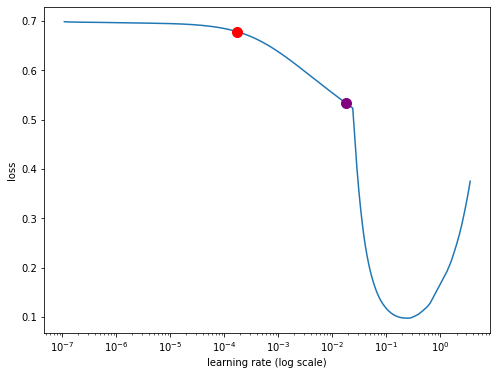

In [13]:
learner.lr_plot(suggest=True)

In [14]:
import gc
gc.collect()

16123

In [15]:
# 2e-5 is one of the LRs  recommended by Google and is consistent with the plot above.
learner.fit_onecycle(1.71E-04, 10)



begin training using onecycle policy with max lr of 0.000171...
Epoch 1/10
1246/1246 [==============================] - 2s 1ms/step - loss: 0.5450 - accuracy: 0.8850 - val_loss: 0.3990 - val_accuracy: 0.9621
Epoch 2/10
1246/1246 [==============================] - 2s 1ms/step - loss: 0.3089 - accuracy: 0.9658 - val_loss: 0.2417 - val_accuracy: 0.9694
Epoch 3/10
1246/1246 [==============================] - 2s 1ms/step - loss: 0.2033 - accuracy: 0.9717 - val_loss: 0.1756 - val_accuracy: 0.9736
Epoch 4/10
1246/1246 [==============================] - 2s 1ms/step - loss: 0.1554 - accuracy: 0.9753 - val_loss: 0.1434 - val_accuracy: 0.9753
Epoch 5/10
1246/1246 [==============================] - 2s 1ms/step - loss: 0.1298 - accuracy: 0.9775 - val_loss: 0.1251 - val_accuracy: 0.9770
Epoch 6/10
1246/1246 [==============================] - 2s 1ms/step - loss: 0.1145 - accuracy: 0.9789 - val_loss: 0.1148 - val_accuracy: 0.9786
Epoch 7/10
1246/1246 [==============================] - 2s 1ms/step - 

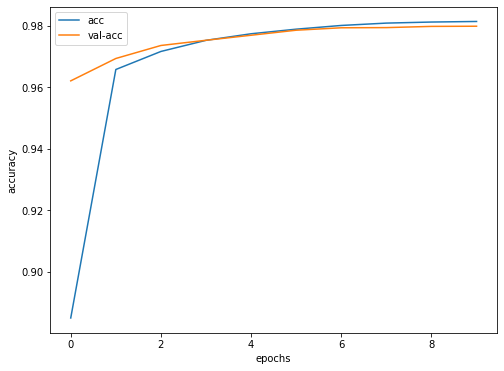

In [16]:
plt.plot(learner.history.history["accuracy"])
plt.plot(learner.history.history["val_accuracy"])
plt.legend(["acc", "val-acc"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

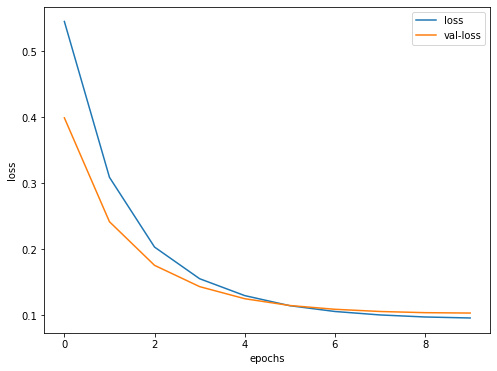

In [17]:
plt.plot(learner.history.history["loss"])
plt.plot(learner.history.history["val_loss"])
plt.legend(["loss", "val-loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [18]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [19]:
probs = predictor.predict_proba(test_data["text"].values)
probs[:5]

array([[0.9982293 , 0.00177074],
       [0.98882306, 0.01117694],
       [0.991899  , 0.00810096],
       [0.00774136, 0.9922586 ],
       [0.9873333 , 0.01266665]], dtype=float32)

In [20]:
y = (test_data.label == "fake")
y.head()

190350    True
193845    True
53917     True
183541    True
194533    True
Name: label, dtype: bool

In [21]:
import metrics as mmetrics

In [22]:
y = y.values.reshape((-1, 1))

perfs = mmetrics.get_performance_metrics(y, probs[:, :1], ["NBSVM"])
perfs

,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,AUC,F1,Threshold
,,,,,,,,,,,,,
NBSVM,1334,42079,76,799,0.98,0.048,0.625,0.998,0.946,0.981,0.923,0.753,0.5
